# Machine Learning: Heart Diseses classification

**Author:
<br> Intesar Zaman
<br> B.Sc. Computer Science and Engineering (EWU)**

in this notebook we will use scikit-learn to build a **Classification Tree** which uses continuos and categorical data from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** to predict whether or not a patient has heart disease using dataset **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**.

The complete collection consists of four individual databases collected from four different institutions located in Cleveland, Hungary, Switzerland, and the VA Long Beach.

We will be using the processed version of the *Cleveland Dataset* from the aforementioned collection. The direct link to the dataset is: (https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data)


## Import Required Libraries

We will building Classification model based on our dataset. We will also visualize our findings for better understanding of our data and model. For that we will require the following libabries.

- `pandas` for data handling
- `numpy` for numerical operations
- Specific modules from `sklearn` for model related operations as required
- `matplotlib.pyplot` and `seaborn` for data visualization

The following lines of codes will import the required libraries.

In [94]:
# Import Libraries for Data handling
import pandas as pd

# Import Libraries for Numerical Operations
import numpy as np


# Import Libraries for Machine Learning
from sklearn.tree import DecisionTreeClassifier, plot_tree # For building and plotting a classification Tree
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.metrics import ConfusionMatrixDisplay # To create and plot a confusion matrix
from sklearn.metrics import classification_report # For generating the classification report
from sklearn.metrics import roc_curve, roc_auc_score # For creating and displaying the ROC curve and AUC value

# Import Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns



## Import the data

Now we load in the dataset from UCI Machine Learning Repository containing the heart disese data. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

In [72]:
df = pd.read_csv('processed.cleveland.data', header=None)

Now that we have loaded the data into a **data frame** called **df**, let's look at the first five rows using the `head()` function:

## Explore Dataset

In [73]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that instead of column names, we just have column numbers. Column names would make it easier to know how to format the data, let's replace the column numbers with the following column names found in **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**:

### Feature variables


- 0: **age** - The age of the patient, in years
- 1: **sex** - The sex/gender of the patient, represented as
        * 0 = female
        * 1 = male
- 2: **chestPain** - Type of Chest Pain present in the patient, represented as
        * 1 = typical angina
        * 2 = atypical angina
        * 3 = non-anginal pain
        * 4 = asymptomatic
- 3: **restingBP** - Resting blood pressure of the patient, in mmHg, during admission to the hospital
- 4: **cholesterol** - Serum cholesterol content of the patient, in mg/dl
- 5: **fastingBloodSugar** - Whether or not the Fasting Blood Sugar (FBS) of the patient is > 120 mg/dl, represented as
        * 0 = false
        * 1 = true
- 6: **restingECG** - resting electrocardiographic results of the patient, represented as
        * 0 = normal
        * 1 = having ST-T wave abnormality
        * 2 = showing probable or definitive left ventricular hypertrophy by Estres' criteria
- 7: **thalMaxRate** - Maximum heart rate achieved during the Thallium Stress Test
- 8: **exAngina** - Presence of Exercise induced angina, represented as
        * 0 = no
        * 1 = yes
- 9: **oldPeak** - ST depression induced by exercise relative to rest
- 10: **slope** - The slope of the peak exercise ST segment, represented as
        * 1 = uploping
        * 2 = flat
        * 3 = downsloping
- 11: **ca** - Number of major vessels colored by fluoroscopy (0~3)
- 12: **thalTest** = The result of Thallium Stress Test, represented as
        * 3 = normal
        * 6 = fixed defect
        * 7 = reversable defect
- 13: **heartDisease** = Diagnosis of heart disease, represented as
        * 0 = Does not have heart disease
        * 1 = Does have heart disease

Since we have identified our dataset features, we can now classify them as numeric or categoric features based on the description of the data.

- **Numeric Features:** `age`, `restingBP`, `cholestoral`, `thalMaxRate`, `oldPeak`, `ca`
- **Categoric Features:** `sex`, `chestPain`, `fastingBloodSugar`, `restingECG`, `exAngina`, `slope`, `thalTest`, `heartDisease`


### Target Variable
The target feature in the dataset for our machine learning is the `heartDisease` feature representing whether a patient has heart disease or not.

In [74]:
# Create a column names list
column_names = [ "age",
                 "sex",
                 "chestPain",
                 "restingBP",
                 "cholesterol", 
                 "fastingBloodSugar",
                 "restingECG",
                 "thalMaxRate",
                 "exAngina",
                 "oldPeak",
                 "slope",
                 "ca",
                 "thalTest",
                 "heartDisease"]

# Set the column names in the dataframe
df.columns = column_names

# Display the result
display(df.head())

,age,sex,chestPain,restingBP,cholesterol,fastingBloodSugar,restingECG,thalMaxRate,exAngina,oldPeak,slope,ca,thalTest,heartDisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


 Now that we have the data in a **data frame** we are ready to identify and deal with **Missing Data**.

## Check Dataset

In [75]:
#check of missing values
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                303 non-null    float64
 1   sex                303 non-null    float64
 2   chestPain          303 non-null    float64
 3   restingBP          303 non-null    float64
 4   cholesterol        303 non-null    float64
 5   fastingBloodSugar  303 non-null    float64
 6   restingECG         303 non-null    float64
 7   thalMaxRate        303 non-null    float64
 8   exAngina           303 non-null    float64
 9   oldPeak            303 non-null    float64
 10  slope              303 non-null    float64
 11  ca                 303 non-null    object 
 12  thalTest           303 non-null    object 
 13  heartDisease       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


None

We can see that among the 14 features present in our dataset, there are 12 features with numeric data types, and 2 features with object data type.

But as we have already seen in the above section, all the data in our dataset are represented by numeric values, which means, in theory, all of the features in our data set should have been of numeric data types.

lets check the data in **ca** and **thalTest** for all unique values

In [76]:
# Display unique values in `ca` column
print("Unique values in `ca` column: ", df['ca'].unique())

# Display unique values in `thalTest` column
print("Unique values in `thalTest` column: ", df['thalTest'].unique())

Unique values in `ca` column:  ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in `thalTest` column:  ['6.0' '3.0' '7.0' '?']


#### observation

> there seems to be numeric values along with `?` values, which tells us that those are missing values in features **ca** and **thalTest**

Let's see how many rows contain these `?` values in **ca** and **thalTest** columns

In [77]:
# Display rows containing `?` in the specified columns
display(len(df.loc[
    (df['ca'] == '?') | (df['thalTest'] == '?')
]))

6

#### observation
> **6** rows contain values `?`, the missing values

In [78]:
# Display rows containing `?` in the specified columns
display(df.loc[
    (df['ca'] == '?') | (df['thalTest'] == '?')
])

,age,sex,chestPain,restingBP,cholesterol,fastingBloodSugar,restingECG,thalMaxRate,exAngina,oldPeak,slope,ca,thalTest,heartDisease
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Let's check other unique values in other columns just to be sure we don't have any more missing values in categorical feature or `?` 

In [79]:
# List of Categorical Features
categorical_features = ["sex", "chestPain", "fastingBloodSugar", "restingECG", "exAngina", "slope", "heartDisease"]

# Display unique values in the categorical feature columns
print("Unique values in the Categorical Feature Columns:")
for feature in categorical_features:
    print(feature, ": ", df[feature].unique())

Unique values in the Categorical Feature Columns:
sex :  [1. 0.]
chestPain :  [1. 4. 3. 2.]
fastingBloodSugar :  [1. 0.]
restingECG :  [2. 0. 1.]
exAngina :  [0. 1.]
slope :  [3. 2. 1.]
heartDisease :  [0 2 1 3 4]


####observation:
> other categorical features don't contain `?`. So other categorical features don't have any missing data.  

## Dealing with Missing Values

Now to deal with the missing values. We have 2 ways of dealing with missing values before in one of them is remove the entries containing the missing values or replace the missing values.

In our case the dataset contains 303 observations among them 6 observations have missing values. if we remove those observation we will have 297 observations.

As we are building a decision tree classifier, the number of 297 observations will not make any significant difference compared to the 303 observations. So, in this case, we can completely remove the observations with the missing values and move forward with only the complete observations.

Before we remove our missing data we will make a copy of current dataframe.

In [80]:
# Create Backup of the Dataframe
df_bak = df.copy()

# Remove missing values from `df`
df = df.loc[
            (df['ca'] != '?') & (df['thalTest'] != '?')
            ]

# Display the resulting dataframe shape
display(df.shape)

(297, 14)

#### checking for the missing values

In [81]:
# List of Categorical Features
categorical_features = ["sex", "chestPain", "fastingBloodSugar", "restingECG", "exAngina", "slope", "ca", "thalTest", "heartDisease"]

# Display unique values in the categorical feature columns
print("Unique values in the Categorical Feature Columns:")
for feature in categorical_features:
    print(feature, ": ", df[feature].unique())

Unique values in the Categorical Feature Columns:
sex :  [1. 0.]
chestPain :  [1. 4. 3. 2.]
fastingBloodSugar :  [1. 0.]
restingECG :  [2. 0. 1.]
exAngina :  [0. 1.]
slope :  [3. 2. 1.]
ca :  ['0.0' '3.0' '2.0' '1.0']
thalTest :  ['6.0' '3.0' '7.0']
heartDisease :  [0 2 1 3 4]


##### observation: 
> there are no `?` in categorical features thus the dataframe doesn't contain any missing values

In our model we wil predict if the patient has heart disease or not 

- 0: means patient does not have heart disease 
- 1>: means patient has heart disease 

but the heartDisease column contains `0` through `4` 

we will need to replace all values higher than `1` in the column to `1`

In [82]:
# Display the value counts in `heartDisease` column before Modification
print("Before Modification:")
print(df["heartDisease"].value_counts())

# Replace values in the `heartDisease` column
df[df["heartDisease"] > 1] =1

# Display the value counts in `heartDisease` column after Modification
print("After Modification:")
print(df["heartDisease"].value_counts())

Before Modification:
0    160
1     54
3     35
2     35
4     13
Name: heartDisease, dtype: int64
After Modification:
0    160
1    137
Name: heartDisease, dtype: int64


## Encoding categorical Features

In the dataset both numerical features and categorical features are in `float64`. this is good for numerical features but bad for categorical features. 

If we keep categorical features as `float64` then while training the model the feature will be treated as a continues feature rather than categorical feature.

we will look at matrices of models trained with both using one hot encoding and label encoding to see which one performs better.

##### Label encoding

In [83]:
# Creating a copy of dataframe that uses label encoding
df_le = df.copy()


#### one hot encoding

In [84]:
# Creating a copy of dataframe that uses one-hot encoding
df_one = df.copy()


# One-hot Encoding the categorical feature
df = pd.get_dummies(df, columns= ['chestPain', 'restingECG', 'slope', 'thalTest'])

# Display the result of encoding
display(df.head())
display(df.shape)


,age,sex,restingBP,cholesterol,fastingBloodSugar,thalMaxRate,exAngina,oldPeak,ca,heartDisease,...,restingECG_0.0,restingECG_1.0,restingECG_2.0,slope_1.0,slope_2.0,slope_3.0,thalTest_1,thalTest_3.0,thalTest_6.0,thalTest_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,0,0,1,0,0,1,0,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,...,0,1,0,1,0,0,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,0,0,1,0,1,0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,1,0,0,0,0,1,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,1,1,0,0,0,1,0,0


(297, 24)

## Separating dataset

### separating feature and target variable

we processed our data now we separate feature and target variable

In [85]:
# Create the Features dataframe
X = df.drop(columns = ["heartDisease"], axis = 1).copy()

# Create the Target Dataframe
y = df[["heartDisease"]].copy()

### splitting Train set and Test set

Next we split Train set and Test set.

we will use `train_test_split()` function from `Scikit Learn`. we will use 80% of the data for train the model and 20% data to test the trained model

in terms of parameters used we will use 

- `random_state = 47`

- `startify = True`

we use `random_state` so that we don't use randomly use 80% data from the dataset to train the model and get different result everytime we train the model

Next we use `stratify = True` so that we have same ratio of `true` and `false`, in this case patient with heart disease and without heart disease stays same within the test data set and training data set.

In [86]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47, stratify = y )

# Display Split Data shapes
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (237, 23)
y_train shape:  (237, 1)
X_test shape:  (60, 23)
y_test shape:  (60, 1)


## Train Decision Tree Model 

Finally its time to train our decision tree model to predict if a patient has heart disease or not.

firstly we initialize an instance of `DecisionTreeClassifier()` model.
then we fit our training data to the model. 

In [87]:
# Create a model instance
model = DecisionTreeClassifier(random_state = 47)

# Fit data to model
model = model.fit(X_train, y_train)

Training is done for our model. Now we can see a diagram of the decision tree we've just made using the `plot_tree()` function from `SciKit Learn`.

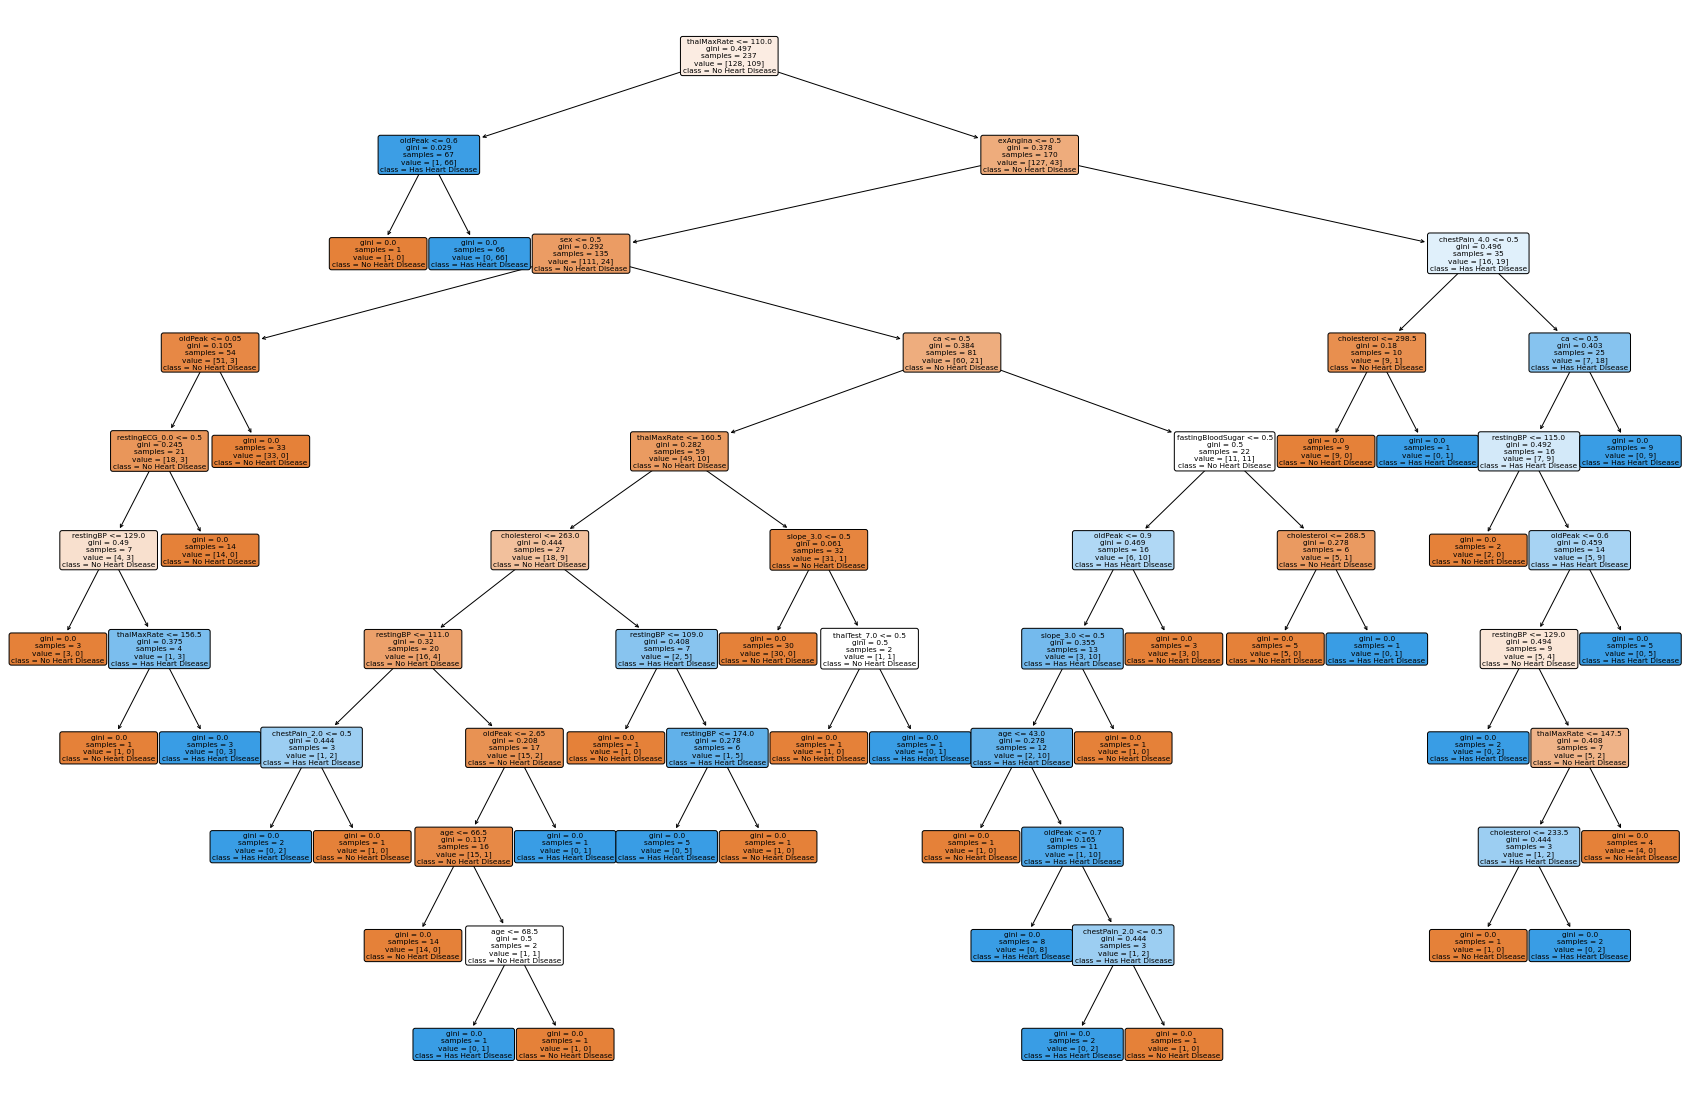

In [88]:
# Plot the Tree Diagram
plt.figure(figsize = (30,20))
plot_tree(model,
          filled = True,
          rounded = True,
          class_names = ["No Heart Disease", "Has Heart Disease"],
          feature_names = X.columns
         )

# Show the plot
plt.show()

We received too large of decision tree from our model it's quite unreadable. We will make use of `max_depth` parameter in the plotting function to have more readable tree.  

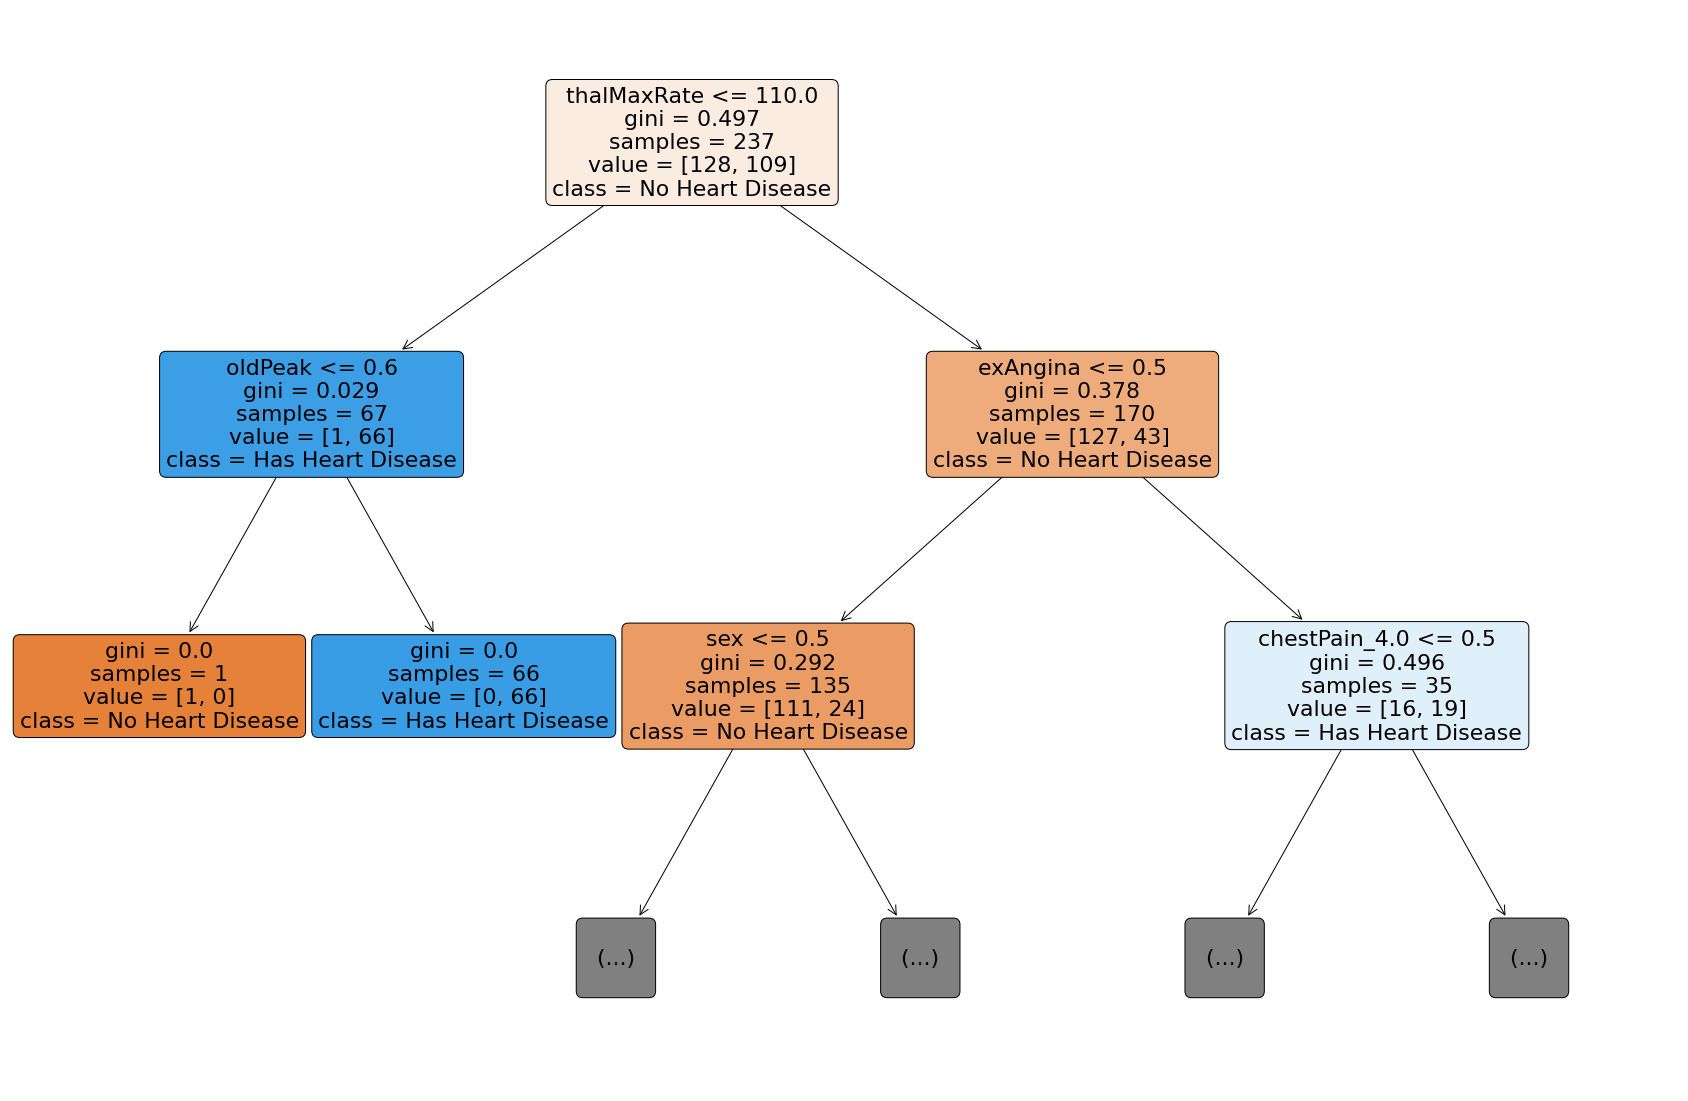

In [89]:
# Plot the Tree Diagram
plt.figure(figsize = (30,20))
plot_tree(model,
          filled = True,
          rounded = True,
          class_names = ["No Heart Disease", "Has Heart Disease"],
          feature_names = X.columns,
          max_depth = 2
         )

# Show the plot
plt.show()

## Predict Results

In [90]:
# Predict from the test set features
y_pred = model.predict(X_test)

## Evaluate Model Performance

WE will use different matrices to evaluate and test our models performance namely confusion matrix and and ROC curve AUC. 

### Confusion Matrix

Confusion matrix is an easy way to visualize how the model is performing. It shows how good our model is performing at predicting.

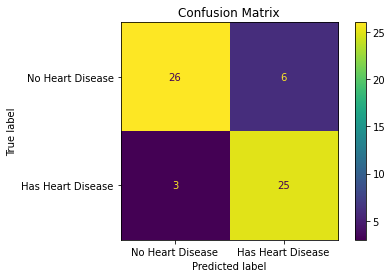

In [91]:
ConfusionMatrixDisplay.from_estimator(model,
                      X_test,
                      y_test,
                      display_labels = ["No Heart Disease", "Has Heart Disease"],
                      
                     )

plt.title("Confusion Matrix")
plt.show()

the classification matrix shows that our trained model is identifying the patient to a very accurate point. The true positive and true negative values are significantly higher than the false positive and false negative values.

### Classification Report

we can calculate `f1 score`, `recall`, `precision`, `support`.

precision: Precision can be seen as a measure of a classifier’s exactness.

recall: Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances.

f1 score: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.

support: Support is the number of actual occurrences of the class in the specified dataset.

We will use function `classification_report()` in `sciKit Learn` to print a classification report containing all the above mentioned matrices 

In [92]:
# Generate and diaplay the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.89      0.85        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



The report shows the precision, recall and the f1-score values are above 80%, which means the model is performing very well on the test dataset.

### ROC Curve and AUC Score

ROC curveROC curve is a visual representation of a model's performance at different classification thresholds. The AUC value is a numerical representation of the model's performance.

The ROC curve and AUC for our model can be plotted using the following 

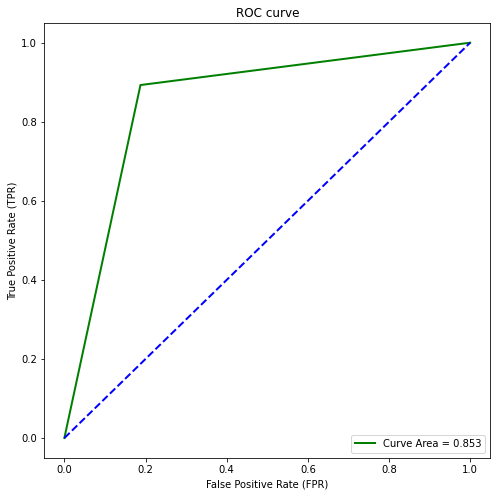

In [93]:
# Get the prediction probabilites
y_pred_proba = model.predict_proba(X_test)[:,1]

# Generate the ROC values
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)

# Evaluate AUC value
auc = np.round(roc_auc_score(y_test, y_pred), 3)

# Plot the ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve above shows that the model will perform best when the TPR or Recall value of the model is just near to 80% and the FPR value will be around 16%. The AUC value is 0.815, which is very good considering our preliminary model.

Although the preliminary model performance is proven satisfactory, optimizations should be made for achieving better performance from the model.